In [10]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
# json 파일을 가져와합니다. 
json_data_path = "./instances_default.json"

with open(json_data_path, 'r', encoding='utf-8') as j :
    json_data = json.load(j)
    
print("json_data type : ", type(json_data))
print(json_data)

json_data type :  <class 'dict'>
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [5]:
print(json_data['categories'])

print(json_data['images'])
# 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]

print(json_data['annotations'])

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


In [6]:
# 변수선언 
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

print(categories_info)
print(images_info)
print(annotations_info)

# 라벨 딕셔너리 선언 
label_dict = {1 : 'cat', 2: 'dog'}

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


bbox 좌표 확인 >>  468 92 171 248
2
dog
bbox 좌표 확인 >>  3 183 200 214
1
cat


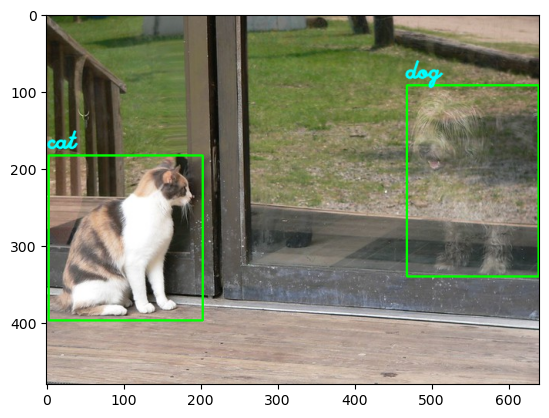

In [16]:
for image_json in images_info : 
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_heigth = image_json['height']
    image_id = image_json['id']
#     print(file_name)
#     print(image_width, image_heigth)
#     print(image_id)
    image_path = os.path.join("./", file_name)
#     print(image_path)
    
    # 파일명만 있는 이유 -> 디렉토리가 어떻게 구성될지 모르기 떄문에 ..
    # image read 
    image = cv2.imread(image_path)
#     print(image)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for anno_json in annotations_info :
        # print(anno_json)
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print("bbox 좌표 확인 >> ", x, y , w, h)
            
            # 박스 그리기 
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
            
            # 라벨 표시 
            categroy_id = anno_json['category_id']
            print(categroy_id)
            
            label_name = label_dict[categroy_id]
            print(label_name)
            image = cv2.putText(image, label_name, (x, y-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1,
                                (0,255,255), 2, cv2.LINE_AA)
            
    plt.imshow(image)
    plt.show()